<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Reference - https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb#scrollTo=jloGNS1MLx3A
# Reference - https://github.com/bubblebeam/Inferno-Realtime-Fire-detection-using-CNNs/blob/master/Jupyter_Notebooks/Training/resume.ipynb

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Location to read the training dataset    
data_directory = "/content/drive/MyDrive/Colab Notebooks/CE888/Training"

In [6]:
# Loading some sample images from the training dataset
sample_fire = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/CE888/sample.jpg')
sample_no_fire = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/CE888/sample4.jpg')

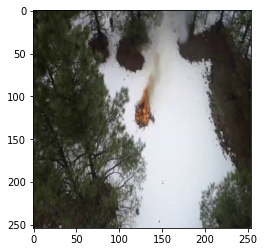

In [196]:
# Show a sample fire image
plt.imshow(sample_fire)

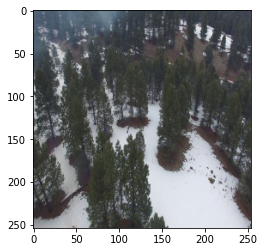

In [197]:
# Show a sample no fire image
plt.imshow(sample_no_fire)

In [7]:
# Selecting the batch_size and image_dimension
batch_size_count = 16
image_height = 224
image_width = 224

In [9]:
# Reading the training dataset
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    # validation_split=0.20, 
    validation_split=0.990,
    subset="training",
    seed=1337,
    image_size=(image_height, image_width),
    batch_size=batch_size_count)

Found 39376 files belonging to 2 classes.
Using 394 files for training.


In [10]:
# Reading the validation dataset
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    # validation_split=0.20,
    validation_split=0.0020,
    subset="validation",
    seed=1337,
    image_size=(image_height, image_width),
    batch_size=batch_size_count)

Found 39376 files belonging to 2 classes.
Using 78 files for validation.


In [11]:
# Print the list of categories of images
class_list = training_dataset.class_names
print(class_list)

['Fire', 'No_Fire']


In [12]:
image_input = Input(shape=(image_height, image_width, 3))

In [204]:
# Creating the transfer model using keras VGG16 pretrainied model
transfer_model = tf.keras.applications.vgg16.VGG16()

In [205]:
# Display the  summary of VGG16 model
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [210]:
# Creating a custom model and adding all the layers except last layer since VGG16 has 1000 classes as the final layer
new_model = Sequential()
for layer in transfer_model.layers[:-1]:
    new_model.add(layer)
    
for layer in new_model.layers:
    layer.trainable = False

In [211]:
# Adding output dense layer at the end of the layer
new_model.add(Dense(units=2, activation='sigmoid'))

In [212]:
# Display the  summary of new model
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [213]:
# Compile the model
new_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['acc'])

In [96]:
# Save the best weights in the drive
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/CE888/weights/v2/vgg16_model.h5', save_best_only=True),
]

In [214]:
# Fitting the model with train data and validating with validation data
history = new_model.fit(
    training_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=[my_callbacks]
    ) 

Epoch 1/10
25/25 [==============================] - 339s 14s/step - loss: 0.3278 - acc: 0.8764 - val_loss: 0.0551 - val_acc: 0.9744
Epoch 2/10
25/25 [==============================] - 241s 10s/step - loss: 0.0510 - acc: 0.9801 - val_loss: 0.0128 - val_acc: 1.0000
Epoch 3/10
25/25 [==============================] - 248s 10s/step - loss: 0.0352 - acc: 0.9841 - val_loss: 0.0192 - val_acc: 0.9872
Epoch 4/10
25/25 [==============================] - 242s 10s/step - loss: 0.0387 - acc: 0.9725 - val_loss: 0.0129 - val_acc: 1.0000
Epoch 5/10
25/25 [==============================] - 247s 10s/step - loss: 0.0111 - acc: 0.9987 - val_loss: 0.0152 - val_acc: 1.0000
Epoch 6/10
25/25 [==============================] - 240s 10s/step - loss: 0.0135 - acc: 0.9931 - val_loss: 0.0304 - val_acc: 0.9872
Epoch 7/10
25/25 [==============================] - 240s 10s/step - loss: 0.0143 - acc: 0.9966 - val_loss: 0.0238 - val_acc: 0.9872
Epoch 8/10
25/25 [==============================] - 240s 10s/step - loss: 0.

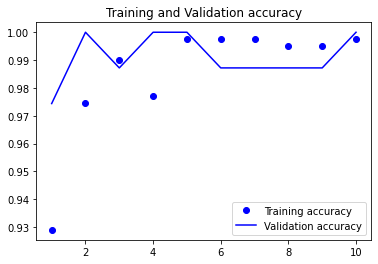

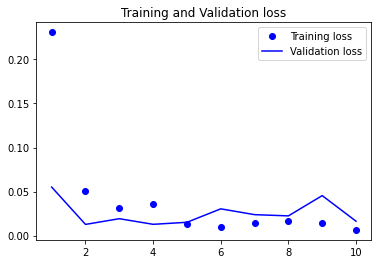

In [216]:
# Reference - https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb#scrollTo=jloGNS1MLx3A

# Visualize the results

training_acc = history.history['acc']
validation_acc = history.history['val_acc']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_acc) + 1)

plt.plot(epochs, training_acc, 'bo', label='Training accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [13]:
# Uncomment when testing with the saved weights
# Load the trainied model
trained_model = load_model('/content/drive/MyDrive/Colab Notebooks/CE888/weights/v2/vgg16_model.h5')

In [14]:
trained_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [15]:
# Predict on the unseen data
unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/CE888/sample.jpg"

# Other sample images
# unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/CE888/Test2/Fire/resized_test_fire_frame0.jpg" 
# unseen_image_path = "/content/drive/MyDrive/Colab Notebooks/CE888/Test/Fire/resized_test_fire_frame631.jpg" 


unseen_image = keras.preprocessing.image.load_img(
    unseen_image_path, target_size=(image_height, image_width)
)

image_array = keras.preprocessing.image.img_to_array(unseen_image)
image_array = tf.expand_dims(image_array, 0) 

predictions = trained_model.predict(image_array)
score = tf.nn.softmax(predictions[0])
print("score: ",100 * np.max(score))

print(
    "The image falls under the {} category with a {:.2f} % confidence."
        .format(class_list[np.argmax(score)], 100 * np.max(score))
)

score:  68.90024542808533
The image falls under the Fire category with a 68.90 % confidence.


In [16]:
# Predicting the model against test dataset

# Read the test dataset images
test_directory = "/content/drive/MyDrive/Colab Notebooks/CE888/Test"

In [27]:
# Loading the test dataset to check the performance of the test data against the model
test_ds = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_directory,target_size=(224,224),classes=['No_Fire', 'Fire'],batch_size=10,shuffle=False)

# Predicting the model
accuracy = trained_model.predict(test_ds,steps=len(test_ds), verbose=0)
accuracy_score(test_ds.classes,np.argmax(accuracy, axis=1))

Found 105 images belonging to 2 classes.


0.5238095238095238

In [158]:
predicted_classes = np.argmax(accuracy, axis=1)
predicted_classes

array([1, 1, 1, ..., 1, 1, 1])

In [165]:
test_labels = test_ds.classes
print('Test labels:', test_labels)
print('Test dataset class indices:', test_ds.class_indices)

Test labels: [0 0 0 ... 1 1 1]
Test dataset class indices: {'No_Fire': 0, 'Fire': 1}


In [160]:
# Reference - https://github.com/bubblebeam/Inferno-Realtime-Fire-detection-using-CNNs/blob/master/Jupyter_Notebooks/Training/resume.ipynb

# Confusion matrix information

def plot_confusion_matrix(confusion_matrix, categories,
                          normalized=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)

    if normalized:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
        print("Confusion matrix after Normalization")
    else:
        print('Confusion matrix without normalization')

    print(confusion_matrix)

    threshold = confusion_matrix.max() / 2.
    for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
        plt.text(j, i, confusion_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')

In [161]:
from sklearn.metrics import confusion_matrix
import itertools
cmatrix = confusion_matrix(test_labels, np.argmax(accuracy, axis=1))

Confusion matrix without normalization
[[  34 3446]
 [ 474 4663]]


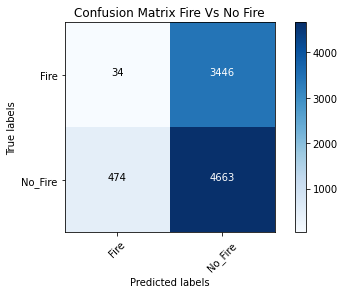

In [162]:
cmatrix_plot_labels = ['Fire','No_Fire']
plot_confusion_matrix(cmatrix, cmatrix_plot_labels, title='Confusion Matrix Fire Vs No Fire')

In [28]:
# Running this to avoid colab from timeout error- a short trick
# while True:pass